In [1]:
import numpy as np
import pandas as pd

In [2]:
yelp = pd.read_csv("N-yelp-P/cleaned_data/top_21_businesses.csv", sep="\t")

In [3]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,name,price,rating,review_count,vader
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g,Secret Pizza,$,4.0,4078,0.7038
1,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-10-25,0.0,VluIpojME0yKOcRKI5L0Iw,3.0,"came here on Monday, no line. its good, but no...",0.0,D1_nrBr4dOrs7M82OaBRwQ,Secret Pizza,$,4.0,4078,0.7506
2,iCQpiavjjPzJ5_3gPD5Ebg,0,2016-05-22,0.0,nsB9JAeghk0zOaSulSm9Yw,5.0,This place is truly a secret! Its so hidden t...,0.0,jEjc8HxeCeI22M4di0Y1aw,Secret Pizza,$,4.0,4078,0.9564
3,iCQpiavjjPzJ5_3gPD5Ebg,0,2014-12-30,0.0,pcn01EMERpCpHEcoaohdEg,5.0,This SECRET PIZZA was a secret for about 5 st...,0.0,RTiaaHSN80VRTLSdNK5rfQ,Secret Pizza,$,4.0,4078,0.9169
4,iCQpiavjjPzJ5_3gPD5Ebg,0,2013-03-24,0.0,0mFtAPTmInbXHqDjX9eiOg,5.0,this is the BEST place to grab a quick slice o...,0.0,hBmJs49zYcXdV4wo8F5iiA,Secret Pizza,$,4.0,4078,0.9090


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91459 entries, 0 to 91458
Data columns (total 14 columns):
business_id     91459 non-null object
cool            91459 non-null int64
date            91459 non-null object
funny           91459 non-null float64
review_id       91459 non-null object
stars           91459 non-null float64
text            91459 non-null object
useful          91459 non-null float64
user_id         91459 non-null object
name            91459 non-null object
price           91459 non-null object
rating          91459 non-null float64
review_count    91459 non-null int64
vader           91459 non-null float64
dtypes: float64(5), int64(2), object(7)
memory usage: 9.8+ MB


In [5]:
yelp.describe()

,cool,funny,stars,useful,rating,review_count,vader
count,91459.000000,91459.000000,91459.000000,91459.000000,91459.000000,91459.000000,91459.000000
mean,0.705639,0.628478,3.787172,1.198799,3.797450,4977.622224,0.697485
std,3.068840,2.766487,1.277416,3.629528,0.462013,1575.982242,0.512152
min,0.000000,0.000000,1.000000,0.000000,2.500000,3245.000000,-0.998000
25%,0.000000,0.000000,3.000000,0.000000,3.500000,3891.000000,0.734950
50%,0.000000,0.000000,4.000000,0.000000,4.000000,4097.000000,0.929900
75%,1.000000,0.000000,5.000000,1.000000,4.000000,5472.000000,0.977800
max,227.000000,202.000000,5.000000,236.000000,4.500000,7968.000000,0.999900


In [6]:
yelp['text length'] = yelp['text'].apply(len)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

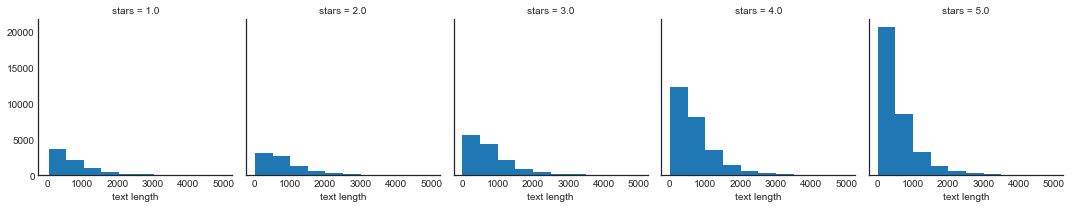

In [8]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

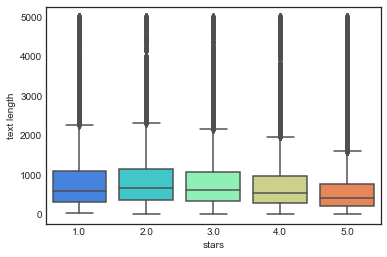

In [9]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

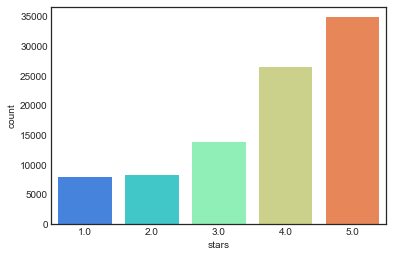

In [10]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [11]:
stars = yelp.groupby('stars').mean()
stars

,cool,funny,useful,rating,review_count,vader,text length
stars,,,,,,,
1.0,0.320322,0.721733,1.467011,3.518572,4663.998993,-0.104028,862.358474
2.0,0.487405,0.693383,1.295770,3.580812,4836.389418,0.328563,883.580210
3.0,0.731503,0.687919,1.286723,3.663713,4959.660975,0.642719,824.222534
4.0,0.872996,0.683168,1.268875,3.815096,5059.957892,0.844732,740.620383
5.0,0.707831,0.526467,1.026209,3.952492,5027.277242,0.877881,604.143357


In [12]:
stars.corr()

,cool,funny,useful,rating,review_count,vader,text length
cool,1.000000,-0.379266,-0.596980,0.757475,0.969795,0.945208,-0.591401
funny,-0.379266,1.000000,0.942653,-0.862337,-0.566960,-0.641746,0.914690
useful,-0.596980,0.942653,1.000000,-0.906819,-0.768513,-0.825142,0.872045
rating,0.757475,-0.862337,-0.906819,1.000000,0.860312,0.892310,-0.966437
review_count,0.969795,-0.566960,-0.768513,0.860312,1.000000,0.994974,-0.708470
vader,0.945208,-0.641746,-0.825142,0.892310,0.994974,1.000000,-0.756157
text length,-0.591401,0.914690,0.872045,-0.966437,-0.708470,-0.756157,1.000000


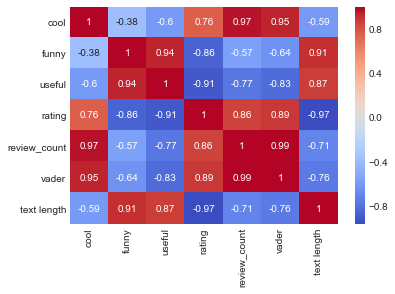

In [13]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

In [14]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [15]:
X = yelp_class['text']
y = yelp_class['stars']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [17]:
X = cv.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [21]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
predictions = nb.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 1965   376]
 [  338 10155]]


             precision    recall  f1-score   support

        1.0       0.85      0.84      0.85      2341
        5.0       0.96      0.97      0.97     10493

avg / total       0.94      0.94      0.94     12834



### Overall Analysis

Based on the reviews, customers wrote more in length for a 1 rating than a 5 rating, which shows that most people have more to say with a complaint than giving a compliment. However more people generally give 4 to 5 rating to the place of business. Customers are more engaged with reading longer comments and mark them useful or funny. Overall based on the 1 and 5 star yelp ratings, the text content given has a high perdiction in the star rating . This model has an accuracy of 94 %.